<a href="https://colab.research.google.com/github/stacykeago/Predict-survival-rate-using-Titanic-dataset--K-Nearest-Neighbour-Classifier-Project-/blob/main/K_Nearest_Neighbour_Classifier_Project___26_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS**

###  Define the question

Use K Nearest Neighbour to predict survival rate using Titanic dataset.

### Metric for success

Determine the split test/train percentage with best accuracy score.
Determine the K with the best accuracy
Determine the K with the least error

### The context


Use K Nearest Neighbour to predict survival rate using Titanic dataset.

### Experimental design taken 

We will use K Nearest Classification

### Appropriateness of available data to answer the given question.

The available data is from Titanic dataset.Since we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

# **DATA CLEANING**

## Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Load the data

In [ ]:
# Data 1: Train dataset
# Data  https://archive.org/download/train5_202002/train%20%285%29.csv
train =pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

In [ ]:
# Data 1:Test data
# Data https://archive.org/download/test1_202002/test%20%281%29.csv
test = pd.read_csv ('https://archive.org/download/test1_202002/test%20%281%29.csv')

## Preview the data

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Dataset Shape 

In [ ]:
train.shape

(891, 12)

In [ ]:
# Train Dataset has 891 rows and 12 columns

### Check the columns in the dataset

In [ ]:
# Get the list of columns in  the dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Drop columns not in use

In [ ]:
train.drop('Ticket',axis='columns', inplace=True)
train.drop('Cabin',axis='columns', inplace=True)
train.drop('Name',axis='columns', inplace=True)
train.drop('PassengerId',axis='columns', inplace=True)

### Dataset summary information

In [ ]:
#Check for dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Statistical summary information

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Check for duplicates

In [ ]:
train.duplicated().any()

True

In [ ]:
# there are no duplicates in the dataset

### Check for Null values

In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### Drop null values

In [ ]:
train=train.dropna()

### Check for unique items

In [ ]:
# check for unique values
train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

### Check and allign data types

In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

#### Label encode some columns

In [ ]:
# Import the libraries for label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
categ = ['Sex', 'Embarked']

# Encode Categorical Columns 
le = LabelEncoder()
train[categ] = train[categ].apply(le.fit_transform) 

#### Convert data types

In [ ]:
train['Fare'] = train['Fare'].astype(int)


In [ ]:
train['Age'] = train['Age'].astype(int)

In [ ]:
train.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
dtype: object

### Check for outliers

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

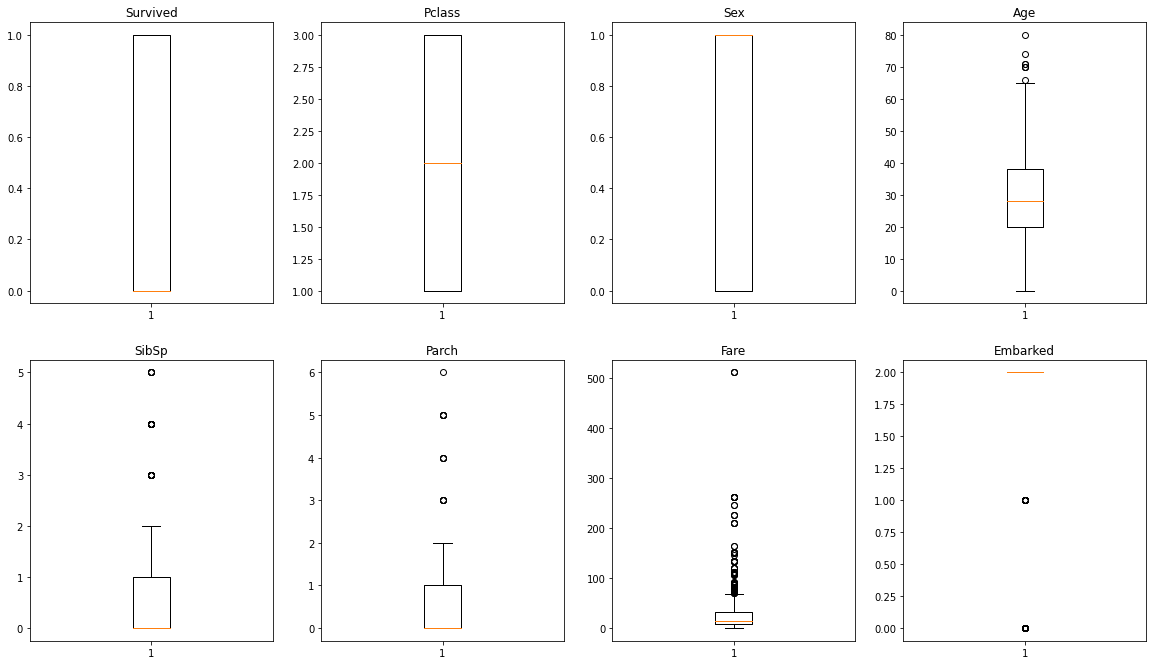

In [ ]:
# Check for outliers for the rest of the columns
col_dict={'Survived':1, 'Pclass':2, 'Sex':3, 'Age':4, 'SibSp':5, 'Parch':6,
       'Fare':7, 'Embarked':8}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in col_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(train[variable])
  plt.title(variable)

plt.show()

### Check for anormalies 

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
columns =['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']
for i in columns:
  print('unique values' in i, 'are :')
  print(train[i].unique())
  print('                                              ')
  print('**********************************************')

False are :
[0 1]
                                              
**********************************************
False are :
[3 1 2]
                                              
**********************************************
False are :
[1 0]
                                              
**********************************************
False are :
[22 38 26 35 54  2 27 14  4 58 20 39 55 31 34 15 28  8 19 40 66 42 21 18
  3  7 49 29 65  5 11 45 17 32 16 25  0 30 33 23 24 46 59 71 37 47 70 12
  9 36 51 44  1 61 56 50 62 41 52 63 43 60 10 64 13 48 53 57 80  6 74]
                                              
**********************************************
False are :
[1 0 3 4 2 5]
                                              
**********************************************
False are :
[0 1 2 5 3 4 6]
                                              
**********************************************
False are :
[  7  71  53   8  51  21  11  30  16  26  31  29  18  13  35 263  27  10
  82  52   9

# **UNIVARIATE ANALYSIS**

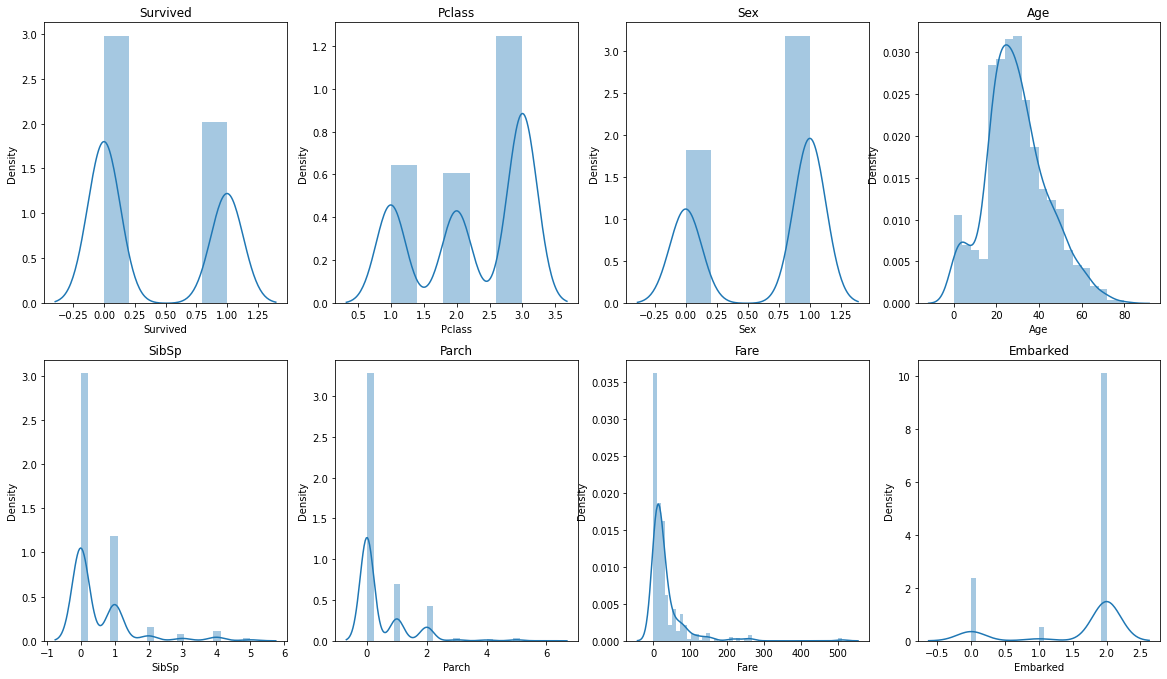

In [ ]:
# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved
col_dict={'Survived':1, 'Pclass':2, 'Sex':3, 'Age':4, 'SibSp':5, 'Parch':6,'Fare':7,'Embarked':8}

plt.figure(figsize = (20,30))
for variable,i in col_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(train[variable])
  plt.title(variable)

plt.show()

BIVARIATE ANALYSIS 

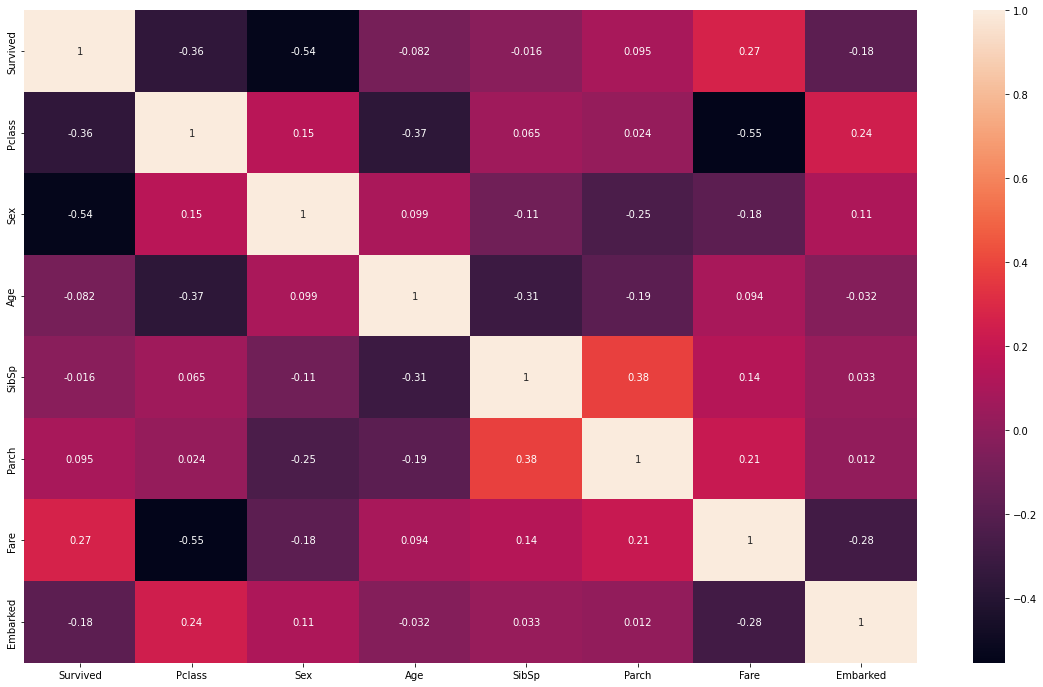

In [ ]:
# Plot a heatmap bivariate analysis of our data
plt.figure(figsize=(20, 12))

vg_corr = train.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

#  MULTIVARIATE ANALYSIS

In [ ]:
correlation = train.corr()

In [ ]:
# Check the correlation between 'survived' and the other variables
correlation['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.266275
Parch       0.095265
SibSp      -0.015523
Age        -0.082377
Embarked   -0.181979
Pclass     -0.356462
Sex        -0.536762
Name: Survived, dtype: float64

Interpretation
When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is NO strong positive correlation between 'survived' and the rest of the columns.

When it is clsoe to -1, it means that there is a strong negative correlation.such as 'sex' 

When it is close to 0, it means that there is no correlation. 'Fare', 'passengerID', 'Pclass', 'Embarked', 'Age', 'Sibsp'

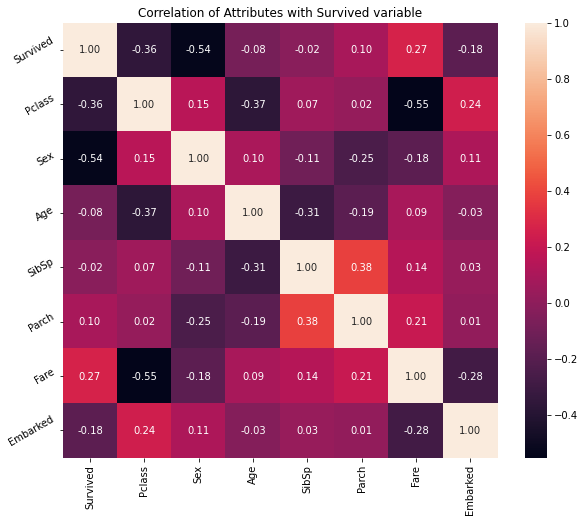

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Survived variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# K- NEAREST NEIGHBOUR

# 1.00 Step 1: Split the data using a 80%-20% training-testing split

### 1.10 Declare feature vector and target variable

In [ ]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [ ]:
# split X and y into training and testing sets use 80%-20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 1.20 Feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1.21 Run KNN for every possible value on this dataset

In [ ]:
# Run the KNN Algorithm on various values of 'k'. 
# The maximum possible value of 'k' possible is the number of instances in the training set.

k_range=list(range(1,len(X_train)))
acc_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_score.append(metrics.accuracy_score(y_test,y_pred))

### 1.22 Plot accuracy values of each K

Text(0, 0.5, 'Accuracy')

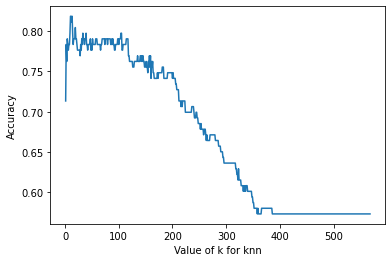

In [ ]:
# Plotting the accuracy values of each k value inorder to select the best value of K
import matplotlib.pyplot as plt

k_values=list(range(1,len(X_train)))
plt.plot(k_values,acc_score)
plt.xlabel('Value of k for knn')
plt.ylabel('Accuracy')

From the above the accuracy decreases when we increase K

### 1.23 Best K value based on the value with the minimum error

Minimum error:- 0.18181818181818182 at K = 9


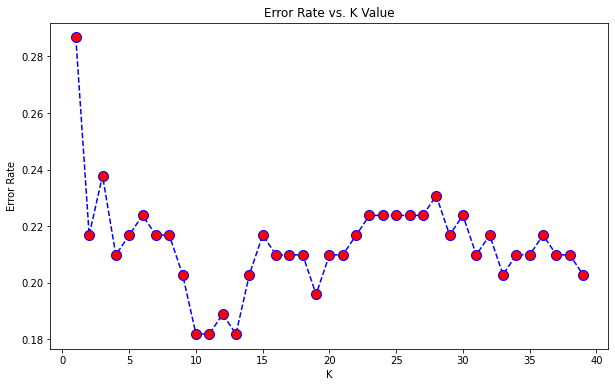

In [ ]:
# Determine the best K value based on the value with the minimum error
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the above the 
Minimum error:- 0.18181818181818182 
at K = 9

### 1.24 Determine the best K value based on the value with the best accuracy

Maximum accuracy:- 0.8181818181818182 at K = 9


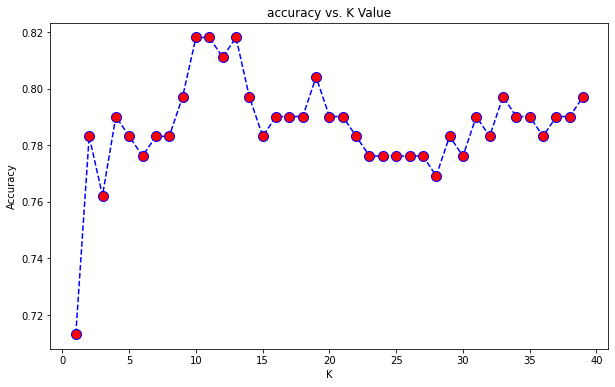

In [ ]:
# Determine the best K value based on the value with the best accuracy
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

From the above the 
Maximum accuracy:- 0.8181818181818182 
at K = 9

### 1.30 Fit K Neighbours Classifier to the training

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=9)
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### 1.40 Predict results

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

### 1.50 Accuracy (percentage of correct classification).

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7972


### 1.60 Compare train and test accuracy score

In [ ]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8506


Training accuracy(0.8506) is higher than the test accuracy (0.7972). When the train/test split is 80%-20%

### 1.70 Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8506
Test set score: 0.7972


### 1.80 Confusion matrix

In [ ]:
# Print the Confusion Matrix with k =9 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[71 11]
 [18 43]]

True Positives(TP) =  71

True Negatives(TN) =  43

False Positives(FP) =  11

False Negatives(FN) =  18


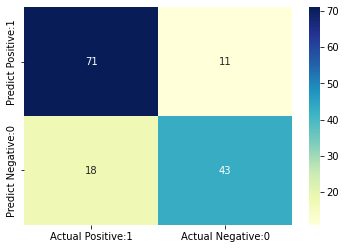

In [ ]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Step 2: Split the data using a 70%-30% training-testing split

### 2.10 Declare feature vector and target variable

In [ ]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [ ]:
# split X and y into training and testing sets use 70%-30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 2.20 Feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.882083,0.739313,0.350052,-0.543073,-0.501181,-0.509857,0.531525
1,-0.324723,0.739313,0.139089,-0.543073,-0.501181,-0.437358,0.531525
2,-1.531528,0.739313,-0.564122,-0.543073,0.648995,0.776996,0.531525
3,-1.531528,0.739313,-0.353159,-0.543073,0.648995,3.858192,-1.989421
4,-1.531528,0.739313,2.248720,-0.543073,-0.501181,-0.038615,0.531525


### 2.30 Fit K Neighbours Classifier to the training

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=9)
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### 2.40 Predict results

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

### 2.50 Accuracy (percentage of correct classification).

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7804


### 2.60 Compare train and test accuracy score

In [ ]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8554


### 2.70 Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8554
Test set score: 0.7804


Train set (0.8554) has higher accuracy than test set(0.7804) in split train/test 70%-30%

### 2.80 Confusion matrix of the classifier.

In [ ]:
# Print the Confusion Matrix with k =9 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[105  20]
 [ 27  62]]

True Positives(TP) =  105

True Negatives(TN) =  62

False Positives(FP) =  20

False Negatives(FN) =  27


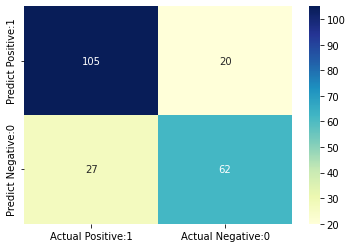

In [ ]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Step 3: Split the data using a 60%-40% training-testing split

### 3.10 Declare feature vector and target variable

In [ ]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [ ]:
# split X and y into training and testing sets use 60%-40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

### 3.20 Feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.882557,-1.358921,1.120793,0.542704,4.270044,-0.110189,0.535591
1,0.882557,0.735878,0.213072,-0.545252,-0.490553,-0.473794,0.535591
2,0.882557,-1.358921,0.422546,0.542704,0.699596,-0.237451,0.535591
3,-0.333094,0.735878,-0.275701,0.542704,-0.490553,-0.128369,0.535591
4,0.882557,0.735878,-0.624825,-0.545252,-0.490553,-0.473794,0.535591


### 3.30 Fit K Neighbours Classifier to the training

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=9)
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### 3.40 Predict results

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

### 3.50 Accuracy (percentage of correct classification).

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8070


### 3.60 Compare train and test accuracy score

In [ ]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8431


### 3.70 Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8431
Test set score: 0.8070


Train set has higher accuracy(0.8431) than test set(0.8070)

### 3.80 Confusion matrix of the classifier.

In [ ]:
# Print the Confusion Matrix with k =9 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[143  26]
 [ 29  87]]

True Positives(TP) =  143

True Negatives(TN) =  87

False Positives(FP) =  26

False Negatives(FN) =  29


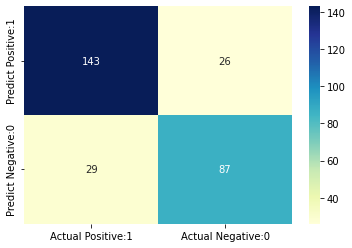

In [ ]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Recommendations to improve KNN classifier.

1. Training accuracy(0.8506) is higher than the test accuracy (0.7972). When the train/test split is 80%-20%
Train set (0.8554) has higher accuracy than test set(0.7804) in split train/test 70%-30%.**This has the best results with highest accuracy.**
Train set has higher accuracy(0.8431) than test set(0.8070) in split train/test 60%-40%.

 In this project, I build a kNN classifier model to classify the survival rate in Titanic dataset. The model yields good performance as indicated by the model accuracy which was found to be (0.8554 with k=9.

